Using BERT for Text Embeddings with AutoTokenizer
Install the Transformers Library:

Install the Hugging Face Transformers library, which includes various pre-trained models including BERT.

In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 18.6 MB/s eta 0:00:00


**Import Necessary Libraries:**

Import the necessary libraries and modules in your Python script.

In [2]:
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.metrics.pairwise import cosine_similarity


# Loading the Tokenizer and Model:

AutoTokenizer.from_pretrained('bert-base-uncased') and AutoModel.from_pretrained('bert-base-uncased') are used to load the tokenizer and model respectively. The 'bert-base-uncased' argument specifies that you're using the base BERT model with uncased text.

In [3]:
# Load pre-trained model tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Getting Embeddings:

The **get_embedding** function takes a text as input and returns the corresponding embedding.

* The **tokenizer** is used to tokenize the input text, with padding and truncation to handle varying text lengths, and **max_length=512** to limit the text length to 512 tokens (the maximum BERT can handle).

* The **model** is used to get the embeddings for the tokenized text.

* The **last_hidden_state** of the output is the embeddings for each token in the input text. These are then averaged across tokens with **.mean(dim=1)** to get a single embedding vector for the entire text.

In [4]:
def get_embedding(text):
    # Encode text and get embeddings
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs['last_hidden_state'].mean(dim=1)

In [7]:
import pandas as pd

In [8]:
# import the excel file
components = pd.read_excel('components.xlsx', sheet_name='Sheet1')
components.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   label                                12 non-null     object
 1   description                          12 non-null     object
 2   keywords                             12 non-null     object
 3   components (description + keywords)  12 non-null     object
 4   components + label                   12 non-null     object
dtypes: object(5)
memory usage: 608.0+ bytes


In [9]:
components['keywords'][11]

'Lesson learned\nSocio economic benefits\nSystematic assessments and reporting'

In [10]:
for col in components.columns:
    components[col] = components[col].replace('\n',' ', regex=True)

components.head()

,label,description,keywords,components (description + keywords),components + label
0,Governance,National Governance mechanisms to ensure coord...,Institutional Framework Regional and National ...,National Governance mechanisms to ensure coord...,National Governance mechanisms to ensure coord...
1,User Interface,"Mechanisms, tools, and systems that allow clim...",Participatory tool Dissemination of informatio...,"Mechanisms, tools, and systems that allow clim...","Mechanisms, tools, and systems that allow clim..."
2,Observation System,"Comprising observing networks, data, data mana...",Satellite Station and network Operations Remot...,"Comprising observing networks, data, data mana...","Comprising observing networks, data, data mana..."
3,Provision and application of climate services,"Decision support products and services, provis...",Climate Application Tools Climate services pro...,"Decision support products and services, provis...","Decision support products and services, provis..."
4,Research modelling and prediction,To advance the science needed for improved cli...,Developing Models Scenarios Predictability N...,To advance the science needed for improved cli...,To advance the science needed for improved cli...


In [13]:
components['keywords'][11]

'Lesson learned Socio economic benefits Systematic assessments and reporting'

In [14]:
projects = pd.read_csv('clean_project_details.csv')
projects.head()

,Country/Region,Project Title,Project Description,Sector,Status,Implementing Entity,Executing Entity,Duration,Approval Date,Start Date,Completion Date,Transferred Amount,Grant Amount
0,Antigua and Barbuda/Latin America & Caribbean,An integrated approach to physical adaptation ...,Antigua and Barbuda is a twin-island state loc...,Multi-sector,Project Under Implementation,Department of Environment Ministry of Health a...,Project Management Unit (PMU) of the ABED,3.5 years,3/17/2017,8/1/2017,NaN,"USD 9,509,250","USD 9,970,000"
1,Argentina/Latin America & Caribbean,Enhancing the Adaptive Capacity and Increasing...,"In the northeast Argentina, 80% of the produ...",Agriculture,Project Completed,Unidad Para Cambio Rural Argentina,"Ministry of Agriculture, Livestock and Fishery;",4.5 years,4/4/2013,10/24/2013,12/31/2018,"USD 5,640,000","USD 5,640,000"
2,Argentina/Latin America & Caribbean,Increasing Climate Resilience and Enhancing Su...,The southwest of the Buenos Aires Province is ...,Rural development,Project Completed,International Bank of Reconstruction and Devel...,Secretaria de Ambiente y Desarollo Sustentable...,4 years,12/14/2012,6/11/2015,9/30/2019,"USD 4,296,817","USD 4,296,817"
3,Armenia/Eastern Europe,Strengthening land based adaptation capacity i...,Due to its climate and pronounced location in ...,Forests,Project Under Implementation,Environmental Project Implementation Unit,Ministry of Nature Protection of RA,3 years,3/15/2019,9/26/2019,NaN,"USD 2,506,000","USD 2,506,000"
4,Armenia/Eastern Europe,Artik city closed stonepit wastes and flood ma...,For years exploited stone pits have had negati...,Urban development,Project Under Implementation,Environmental Project Implementation Unit,Ministry of Nature Protection of RA,4 years,10/12/2018,7/26/2019,NaN,"USD 1,435,100","USD 1,435,100"


In [15]:
# 1. Extract numeric value of the duration column
projects['Duration'] = projects['Duration'].apply(lambda x: float(x.split(' ')[0]))
projects['Duration'].head()

0    3.5
1    4.5
2    4.0
3    3.0
4    4.0
Name: Duration, dtype: float64

In [16]:
# 2. Convert date columns to datetime type
date_columns = ['Approval Date', 'Start Date', 'Completion Date']
projects[date_columns] = projects[date_columns].apply(pd.to_datetime, format="%m/%d/%Y" , errors='coerce')
projects[date_columns]

,Approval Date,Start Date,Completion Date
0,2017-03-17,2017-08-01,NaT
1,2013-04-04,2013-10-24,2018-12-31
2,2012-12-14,2015-06-11,2019-09-30
3,2019-03-15,2019-09-26,NaT
4,2018-10-12,2019-07-26,NaT
...,...,...,...
95,2020-06-01,2021-09-02,NaT
96,2011-06-22,2012-05-22,2017-09-29
97,2016-07-05,2017-05-07,NaT
98,2014-02-10,2014-05-26,2021-11-30


In [17]:
# 3. Convert "USD 9,500,200" style strings to integers in the financial columns
financial_columns = ['Grant Amount', 'Transferred Amount']
for col in financial_columns:
    projects[col] = projects[col].replace('[^\d.]', '', regex=True).astype(int)

projects[financial_columns]

,Grant Amount,Transferred Amount
0,9970000,9509250
1,5640000,5640000
2,4296817,4296817
3,2506000,2506000
4,1435100,1435100
...,...,...
95,9997190,2278477
96,2929500,2929500
97,7751000,7751000
98,5415103,5415103


In [18]:
projects.head()

,Country/Region,Project Title,Project Description,Sector,Status,Implementing Entity,Executing Entity,Duration,Approval Date,Start Date,Completion Date,Transferred Amount,Grant Amount
0,Antigua and Barbuda/Latin America & Caribbean,An integrated approach to physical adaptation ...,Antigua and Barbuda is a twin-island state loc...,Multi-sector,Project Under Implementation,Department of Environment Ministry of Health a...,Project Management Unit (PMU) of the ABED,3.5,2017-03-17,2017-08-01,NaT,9509250,9970000
1,Argentina/Latin America & Caribbean,Enhancing the Adaptive Capacity and Increasing...,"In the northeast Argentina, 80% of the produ...",Agriculture,Project Completed,Unidad Para Cambio Rural Argentina,"Ministry of Agriculture, Livestock and Fishery;",4.5,2013-04-04,2013-10-24,2018-12-31,5640000,5640000
2,Argentina/Latin America & Caribbean,Increasing Climate Resilience and Enhancing Su...,The southwest of the Buenos Aires Province is ...,Rural development,Project Completed,International Bank of Reconstruction and Devel...,Secretaria de Ambiente y Desarollo Sustentable...,4.0,2012-12-14,2015-06-11,2019-09-30,4296817,4296817
3,Armenia/Eastern Europe,Strengthening land based adaptation capacity i...,Due to its climate and pronounced location in ...,Forests,Project Under Implementation,Environmental Project Implementation Unit,Ministry of Nature Protection of RA,3.0,2019-03-15,2019-09-26,NaT,2506000,2506000
4,Armenia/Eastern Europe,Artik city closed stonepit wastes and flood ma...,For years exploited stone pits have had negati...,Urban development,Project Under Implementation,Environmental Project Implementation Unit,Ministry of Nature Protection of RA,4.0,2018-10-12,2019-07-26,NaT,1435100,1435100


In [19]:
# Now the projects dataset and componets dataset are ready to be used for the BERT encoder to get the embeddings

In [20]:
#  Apply function to each row individually
project_embedding = projects['Project Description'].apply(get_embedding)

In [21]:
project_embedding.shape

(100,)

In [22]:
project_embedding[1].shape

torch.Size([1, 768])

It seems like each element in project_embedding is a tensor of shape
(
1
,
768
)
(1,768). This is likely because you calculated embeddings for each project description separately and stored them in a list or a similar data structure. In order to conduct operations (like similarity computations) across all embeddings simultaneously, it might be beneficial to concatenate them into a single tensor. You can do this using torch.cat:

In [23]:
# Ensure all items are tensors
assert all(isinstance(item, torch.Tensor) for item in project_embedding)

# Convert to a tuple and concatenate
all_project_embeddings = torch.cat(tuple(project_embedding), dim=0)
all_project_embeddings.shape

torch.Size([100, 768])

In [24]:
all_project_embeddings[0]

tensor([-4.2401e-01, -3.4681e-02,  2.6056e-01,  1.5688e-02,  5.0966e-01,
        -7.8804e-02, -3.3643e-03,  2.7500e-01,  1.3218e-01, -3.4827e-01,
         6.2883e-03, -1.2718e-01, -3.2225e-01,  3.6206e-01,  5.4837e-02,
         5.4518e-01,  5.5871e-01,  1.0192e-01,  1.0878e-01,  4.9615e-01,
         4.1048e-03, -3.4665e-01, -8.3452e-03,  9.5939e-01,  6.4090e-01,
         4.5444e-02,  4.6356e-02,  2.8593e-01, -3.1186e-02, -2.1244e-02,
         6.6226e-01, -6.5829e-02, -4.2214e-01, -5.8875e-01,  2.8598e-01,
         1.6059e-01, -4.1259e-01, -3.2436e-01, -1.7283e-01,  2.0284e-01,
        -5.3202e-01, -2.9379e-01, -1.0308e-01, -1.1005e-01, -5.9570e-02,
        -4.7092e-02,  2.0335e-01,  5.4759e-02,  2.4488e-02, -4.2876e-02,
        -5.4549e-01,  2.0651e-01, -3.6394e-01, -8.6168e-02,  3.0697e-01,
         5.4884e-01, -1.3350e-01, -4.9027e-01, -4.6272e-01, -3.1374e-01,
        -4.2613e-02, -9.8341e-02,  5.8868e-02, -3.9699e-01, -8.0295e-02,
         9.8248e-02, -6.4524e-02,  2.8240e-01, -2.7

In [25]:
components.head()

,label,description,keywords,components (description + keywords),components + label
0,Governance,National Governance mechanisms to ensure coord...,Institutional Framework Regional and National ...,National Governance mechanisms to ensure coord...,National Governance mechanisms to ensure coord...
1,User Interface,"Mechanisms, tools, and systems that allow clim...",Participatory tool Dissemination of informatio...,"Mechanisms, tools, and systems that allow clim...","Mechanisms, tools, and systems that allow clim..."
2,Observation System,"Comprising observing networks, data, data mana...",Satellite Station and network Operations Remot...,"Comprising observing networks, data, data mana...","Comprising observing networks, data, data mana..."
3,Provision and application of climate services,"Decision support products and services, provis...",Climate Application Tools Climate services pro...,"Decision support products and services, provis...","Decision support products and services, provis..."
4,Research modelling and prediction,To advance the science needed for improved cli...,Developing Models Scenarios Predictability N...,To advance the science needed for improved cli...,To advance the science needed for improved cli...


In [26]:
components.columns

Index(['label', 'description', 'keywords',
       'components (description + keywords)', 'components + label'],
      dtype='object')

In [27]:
# column of interest in the components dataset
col_interest = 'label'

In [28]:
# Embeding the 12 rows for the column of interest
col_interest_components = components[col_interest]
col_interest_components

0                                            Governance
1                                        User Interface
2                                    Observation System
3         Provision and application of climate services
4                     Research modelling and prediction
5                                  Capacity development
6         Monitoring and Evaluation of climate services
7                Disaster risk knowledge and management
8     Detection, Observation, Monitoring, Analysis &...
9              Warning Dissemination and Communication 
10                   Disaster Preparedness and Response
11        Monitoring and Evaluation of climate services
Name: label, dtype: object

In [29]:
# Getting embeddings
component_embeddings = torch.stack([get_embedding(col) for col in col_interest_components])

In [30]:
component_embeddings.shape

torch.Size([12, 1, 768])

In [31]:
all_component_embeddings= component_embeddings.squeeze(1)
all_component_embeddings.shape

torch.Size([12, 768])

In [32]:
all_project_embeddings.shape

torch.Size([100, 768])

In [33]:
#all_component_embeddings[0]

Now that all_project_embeddings and all_component_embeddings both have the shape
(
100
,
768
)
(100,768), you can compare them, find similarities, or perform any other operations that you need

# Similarity scores

In [34]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Convert the torch tensor to numpy array
project_embeddings_np = all_project_embeddings.numpy()
component_embeddings_np = all_component_embeddings.numpy()

# Calculate similarity matrix
similarity_matrix = cosine_similarity(project_embeddings_np, component_embeddings_np)


In [35]:
similarity_matrix.shape

(100, 12)

In [36]:
similarity_matrix

array([[0.3000946 , 0.38254434, 0.2667643 , ..., 0.45760137, 0.58952993,
        0.5873064 ],
       [0.27667725, 0.38929886, 0.28695947, ..., 0.45137146, 0.5769986 ,
        0.6134417 ],
       [0.2953073 , 0.38003543, 0.2496448 , ..., 0.4748273 , 0.6081601 ,
        0.62730986],
       ...,
       [0.27776518, 0.37666777, 0.24112432, ..., 0.46499565, 0.60615975,
        0.58851916],
       [0.27467036, 0.3794605 , 0.25731808, ..., 0.47037864, 0.6051268 ,
        0.58955693],
       [0.25855368, 0.3923676 , 0.2573776 , ..., 0.4451126 , 0.5668415 ,
        0.57335687]], dtype=float32)

In the similarity_matrix, each row corresponds to a project, and each column corresponds to a component. The value at similarity_matrix[i, j] indicates the cosine similarity between the i-th project and the j-th component.

In [37]:
# Normalizing the similarity matrix so that each row adds up to 1
normalized_similarity_matrix = similarity_matrix / similarity_matrix.sum(axis=1, keepdims=True)
normalized_similarity_matrix[:1, :]

array([[0.0508908 , 0.06487283, 0.04523856, 0.10311103, 0.0780632 ,
        0.06817543, 0.0995969 , 0.1017558 , 0.11112336, 0.07760119,
        0.09997397, 0.0995969 ]], dtype=float32)

In [38]:
projects.shape

(100, 13)

In [39]:
# combining the similarity matrix and the projects data frame.

# Ensure the similarity matrix is a DataFrame and has appropriate column names
similarity_df = pd.DataFrame(normalized_similarity_matrix, columns=[f'pc{i}' for i in range(1, 13)])

# Concatenate the similarity DataFrame with the original projects DataFrame
projects_with_scores = pd.concat([projects, similarity_df], axis=1)
projects_with_scores.head()

,Country/Region,Project Title,Project Description,Sector,Status,Implementing Entity,Executing Entity,Duration,Approval Date,Start Date,...,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,Antigua and Barbuda/Latin America & Caribbean,An integrated approach to physical adaptation ...,Antigua and Barbuda is a twin-island state loc...,Multi-sector,Project Under Implementation,Department of Environment Ministry of Health a...,Project Management Unit (PMU) of the ABED,3.5,2017-03-17,2017-08-01,...,0.045239,0.103111,0.078063,0.068175,0.099597,0.101756,0.111123,0.077601,0.099974,0.099597
1,Argentina/Latin America & Caribbean,Enhancing the Adaptive Capacity and Increasing...,"In the northeast Argentina, 80% of the produ...",Agriculture,Project Completed,Unidad Para Cambio Rural Argentina,"Ministry of Agriculture, Livestock and Fishery;",4.5,2013-04-04,2013-10-24,...,0.048217,0.101938,0.082493,0.063489,0.103075,0.101419,0.111600,0.075843,0.096951,0.103075
2,Argentina/Latin America & Caribbean,Increasing Climate Resilience and Enhancing Su...,The southwest of the Buenos Aires Province is ...,Rural development,Project Completed,International Bank of Reconstruction and Devel...,Secretaria de Ambiente y Desarollo Sustentable...,4.0,2012-12-14,2015-06-11,...,0.040705,0.106529,0.082149,0.065422,0.102284,0.103927,0.110002,0.077421,0.099161,0.102284
3,Armenia/Eastern Europe,Strengthening land based adaptation capacity i...,Due to its climate and pronounced location in ...,Forests,Project Under Implementation,Environmental Project Implementation Unit,Ministry of Nature Protection of RA,3.0,2019-03-15,2019-09-26,...,0.043676,0.103408,0.080345,0.064708,0.100910,0.104821,0.113679,0.075991,0.099039,0.100910
4,Armenia/Eastern Europe,Artik city closed stonepit wastes and flood ma...,For years exploited stone pits have had negati...,Urban development,Project Under Implementation,Environmental Project Implementation Unit,Ministry of Nature Protection of RA,4.0,2018-10-12,2019-07-26,...,0.053782,0.101512,0.079993,0.064213,0.100245,0.099252,0.113831,0.078128,0.093238,0.100245


In [40]:
projects_with_scores.to_excel(f'projects_with_scores_{col_interest}.xlsx', index=False)


# Visualization

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume `df` is your DataFrame and `similarity_score_columns` is a list of the names of the columns holding the similarity scores.

def plot_similarity_scores(project_index, df, similarity_score_columns, component_labels):
    """
    Plot a bar chart of similarity scores for a specified project.

    Parameters:
    - project_index: int, the index of the project to plot.
    - df: DataFrame, the data.
    - similarity_score_columns: list of str, the names of the columns containing the similarity scores.
    - component_labels: list of str, labels for the components.
    """
    # Extract the similarity scores for the specified project.
    scores = df.loc[project_index, similarity_score_columns].values

    # Create a bar plot.
    plt.figure(figsize=(10, 6))
    plt.bar(component_labels, scores, color='skyblue')
    plt.xlabel('Component')
    plt.ylabel('Similarity Score')
    plt.title(f'Similarity Scores for Project ID {project_index}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot.
    plt.show()


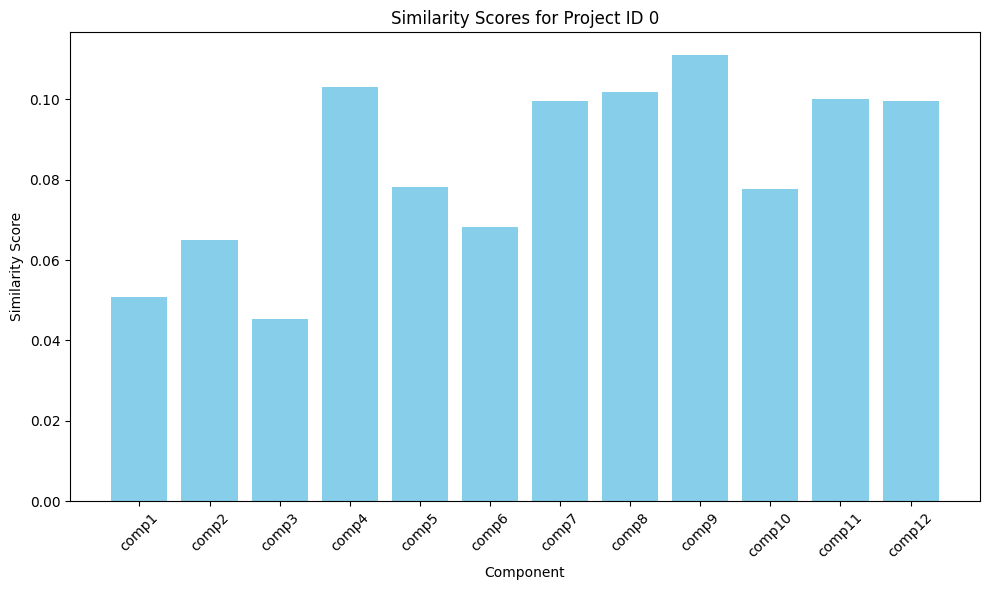

In [42]:
plot_similarity_scores(project_index=0, df=projects_with_scores, similarity_score_columns=[f'pc{i}' for i in range(1, 13)], component_labels=[f'comp{i}' for i in range(1, 13)])

In [43]:
dollar_allocation_per_component = projects_with_scores[[f'pc{i}' for i in range(1, 13)]] * projects['Grant Amount'].values.reshape(-1, 1)
dollar_allocation_per_component

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
0,507381.234989,646782.126129,451028.462425,1.028017e+06,778290.152699,679709.013328,9.929810e+05,1.014505e+06,1.107900e+06,773683.833703,996740.472540,9.929810e+05
1,262199.180424,368927.502930,271943.346709,5.749314e+05,465259.005725,358076.265156,5.813413e+05,5.720012e+05,6.294221e+05,427751.950622,546805.197001,5.813413e+05
2,206892.983784,266253.705528,174901.724110,4.577342e+05,352981.104145,281106.995608,4.394947e+05,4.465534e+05,4.726600e+05,332665.094461,426078.363227,4.394947e+05
3,114038.111985,167922.803849,109451.001301,2.591403e+05,201344.301954,162157.748669,2.528802e+05,2.626813e+05,2.848790e+05,190433.607161,248191.406071,2.528802e+05
4,66500.839100,99343.095059,77181.849485,1.456797e+05,114797.518952,92151.681025,1.438610e+05,1.424369e+05,1.633593e+05,112121.475124,133805.719897,1.438610e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
95,463261.292169,645047.464070,475963.941871,1.018066e+06,786315.170265,666509.311011,1.016412e+06,1.018622e+06,1.114021e+06,777552.174298,999007.684390,1.016412e+06
96,148090.074090,200182.658315,143405.533969,2.987698e+05,227999.912482,203248.383287,2.930809e+05,2.970178e+05,3.080105e+05,224699.814811,291913.595986,2.930809e+05
97,362935.601987,492164.434187,315059.633031,8.005978e+05,618619.964540,503921.875753,7.689753e+05,8.265170e+05,8.936318e+05,607576.075181,792024.931669,7.689753e+05
98,249704.764884,344970.211333,233929.671817,5.595816e+05,436355.312939,353168.570755,5.359704e+05,5.710378e+05,6.166642e+05,427624.511824,550125.034716,5.359704e+05


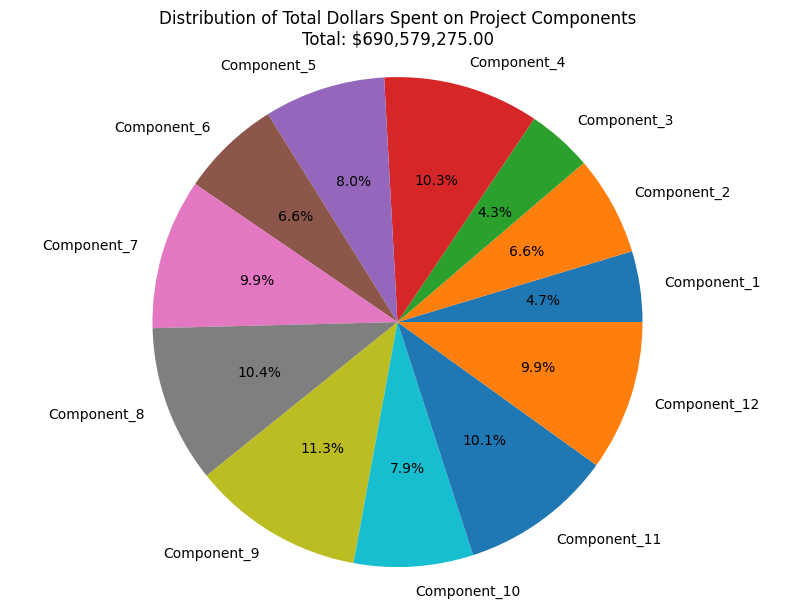

In [44]:
# Calculate the dollar allocation per component per project
dollar_allocation_per_component = projects_with_scores[[f'pc{i}' for i in range(1, 13)]] * projects['Grant Amount'].values.reshape(-1, 1)

# Sum up the allocated dollars per component across all projects
total_dollars_per_component = dollar_allocation_per_component.sum(axis=0)

# Calculating the total dollar amount
total_dollar_amount =projects['Grant Amount'].sum()

# Labels for the components
component_labels = [f'Component_{i+1}' for i in range(12)]

# Plotting
plt.figure(figsize=(10, 7))
plt.pie(total_dollars_per_component, labels=component_labels, autopct='%1.1f%%')
plt.title(f'Distribution of Total Dollars Spent on Project Components\nTotal: ${total_dollar_amount:,.2f}')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [45]:
# Filtering the top 5 projects with highest project component 5 for example.
highlighted_component = 'pc5'
top_projects = projects_with_scores.nlargest(5, highlighted_component)
top_projects

,Country/Region,Project Title,Project Description,Sector,Status,Implementing Entity,Executing Entity,Duration,Approval Date,Start Date,...,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
33,Indonesia/Asia-Pacific,Safekeeping-Surviving-Sustaining towards Resil...,Adaptation measures taken in Pekalongan City t...,Multi-sector,Project Under Implementation,Partnership for Governance Reform (Kemitraan) ...,Kemitraan (The Partnership for Governance Reform),3.0,2020-09-23,2021-07-15,...,0.048119,0.100595,0.083604,0.063927,0.095760,0.102309,0.116207,0.084265,0.096916,0.095760
46,"Moldova, Republic of/Eastern Europe",Talent Retention for Rural Transformation – Ad...,The aim of the project is to build climate res...,Food Security,Project Under Implementation,International Fund Agricultural Dev,Ministry of Agriculture Rural Development and\...,4.0,2019-10-11,2021-03-22,...,0.041619,0.106428,0.083563,0.069025,0.099779,0.102400,0.111048,0.077820,0.100031,0.099779
63,Regional/Other,Reducing vulnerabilities of populations in the...,The objective of the proposed project is to st...,Disaster risk reduction and early warning system,Project Under Implementation,"United Nations Educational, Scientific and Cul...",UNESCO Cluster office in Almaty,4.0,2020-10-15,2021-04-29,...,0.038782,0.102262,0.083179,0.065649,0.097696,0.105121,0.115820,0.083540,0.105069,0.097696
24,Honduras/Latin America & Caribbean,Ecosystem-Based Adaptation at Communities of t...,Objectives: The goal of the project is to incr...,Ecosystem-based adaptation,Project Under Implementation,UN Development Programme,"Ministry of Energy, Natual Resources, Environment",5.0,2017-03-17,2019-03-04,...,0.038228,0.106908,0.083064,0.065818,0.101587,0.104877,0.112027,0.080209,0.100171,0.101587
54,Niger/Africa,Enhancing Resilience of Agriculture to Climate...,"In Niger, the country’s agricultural productio...",Rural development,Project Under Implementation,Banque Ouest Africaine de Developpement,Ministry of Agriculture of Niger,5.0,2016-07-05,2020-03-17,...,0.047332,0.102061,0.082837,0.066521,0.100343,0.099853,0.110298,0.079069,0.098160,0.100343


In [46]:
# Filtering the DataFrame based on multiple conditions
filtered_projects = projects_with_scores[(projects_with_scores['pc8'] > 0.105) & (projects_with_scores['pc2'] > 0.05)]
filtered_projects

,Country/Region,Project Title,Project Description,Sector,Status,Implementing Entity,Executing Entity,Duration,Approval Date,Start Date,...,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
5,Bangladesh/Asia-Pacific,Adaptation Initiative for Climate Vulnerable O...,Bangladesh has a low-lying topography extremel...,Disaster Risk Reduction,Project Under Implementation,UN Development Programme,"Department of Environment, Ministry of Environ...",5.0,2019-03-15,2021-06-29,...,0.041472,0.103549,0.078148,0.064880,0.099003,0.106497,0.116423,0.076058,0.101694,0.099003
7,Cambodia/Asia-Pacific,Climate Change Adaptation through Protective S...,"Cambodia is vulnerable to droughts, floods an...",Urban development,Project Under Implementation,UN-Habitat,National Council for Sustainable\rDevelopment ...,4.0,2021-01-26,2021-08-26,...,0.042060,0.102004,0.077599,0.065089,0.098544,0.106262,0.118142,0.077272,0.103747,0.098544
11,Congo/Africa,Building adaptive capacity to climate change i...,Congo is experiencing main climate change impa...,Food Security,Project Under Implementation,UN World Food Programme,"Ministry of Tourism and Environment ,",5.0,2019-10-11,2022-02-22,...,0.040762,0.102892,0.079107,0.065667,0.099507,0.105685,0.113985,0.077884,0.101197,0.099507
16,Ecuador/Latin America & Caribbean,Enhancing resilience of communities to the adv...,Background:Nearly half of the communities in t...,Food Security,Project Completed,UN World Food Programme,Ministry of Environment in coord with the Min ...,5.0,2011-03-18,2011-11-29,...,0.040715,0.099768,0.078183,0.065571,0.096668,0.106722,0.114125,0.075295,0.101643,0.096668
19,Fiji/Asia-Pacific,Increasing the resilience of informal urban se...,Fiji is located in the Pacific Ocean’s tropica...,Urban development,Project Under Implementation,UN-Habitat,"Ministry of Local Government, Housing &amp;amp...",5.0,2017-10-10,2018-08-12,...,0.043228,0.102251,0.077691,0.064515,0.099092,0.107431,0.117192,0.076651,0.101641,0.099092
31,India/Asia-Pacific,Conservation and Management of Coastal Resourc...,"The Krishna delta, home to about 4.5 million p...",Coastal management,Project Under Implementation,National Bank for Agriculture and Rural Develo...,M. S. Swaminathan Research Foundation (MSSRF),4.0,2014-10-10,2015-06-23,...,0.043044,0.104228,0.079091,0.062989,0.097523,0.106075,0.119687,0.077251,0.099365,0.097523
36,Indonesia/Asia-Pacific,Community Adaptation for Forest-Food Based Man...,The level of area risk due to climate change ...,Food Security,Project Under Implementation,Partnership for Governance Reform (Kemitraan) ...,Environmental and Climate Change Adaptation\rC...,1.0,2019-07-08,2020-10-20,...,0.044404,0.103384,0.078634,0.063996,0.098583,0.105239,0.116315,0.081831,0.100163,0.098583
37,Kenya/Africa,Integrated Programme To Build Resilience To Cl...,Kenya comprises 83% of arid and semi-arid land...,Multi-sector,Project Under Implementation,National Environment Management Authority,"KEFRI, TARDA, CDA",3.0,2014-10-10,2016-01-29,...,0.038488,0.104097,0.078307,0.064817,0.096551,0.106557,0.118404,0.080222,0.104954,0.096551
39,Lao People's Democratic Republic/Asia-Pacific,Enhancing the climate and disaster resilience ...,Lao People’s Democratic Republic (PDR) is one ...,Disaster Risk Reduction,Project Under Implementation,UN-Habitat,Ministry of Natural Resources and Environment;...,4.0,2016-10-07,2017-02-24,...,0.043251,0.101054,0.077681,0.065127,0.099523,0.105443,0.115934,0.078999,0.104412,0.099523
42,Madagascar/Africa,Promoting climate resilience in the rice secto...,Rice production in Madagascar occurs in a vari...,Agriculture,Project Completed,UN Environment Programme,Ministry of Environment and Forests in partner...,5.0,2011-12-14,2012-10-24,...,0.040721,0.104716,0.081805,0.063878,0.101619,0.105280,0.113642,0.079081,0.100299,0.101619
